# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

1. I believe any digit has an equal chance of being the first digit. The first number can be any number 1-9, and I believe the digit 9 has a 1/9 chance or 11% of values will start with the number 9. For the first digit being 1, I beleieve there is a higher chance. For example, if numbers fall between something like 1,000 and 1,500, the first digit will always be 1. Because of this I think there is a about 4 times as likely to appear as the first digit, so 44%

2. For the last digit being 1, I believe the it has a lower chance then being the first digit, especially if there are floating point numbers since those rarely end in .1 in my opinion. I would say the percentage of values for a last digit of 1 would be half of the equal chance, or 5.5%. I also believe 9 has an equal chance of being the last digit, so 11% for 9 being the last digit.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [58]:
# ENTER YOUR CODE HERE.
import pandas as pd
df = pd.read_csv("sp500.csv")
df.head()

df = df.set_index("Name") # setting the index to be "Name"
# print(df) # whole data frame
df.head() # updated first 5 rows of index being name

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


**ENTER YOUR WRITTEN EXPLANATION HERE.**

In terms of indexing data in the dataset, such as companies in the S&P 500, it makes more sense to index the name of the company rather then trying to index the opening or closing numbers. People using the dataset most likely don't know the exact numbers of a stock, but are more likely to know the name of a company. The best practice would be to use the "Name" attribute.

## Question 2



We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

My initial prediction was higher at 44% of the values being a digit of 1, in comparison to about 31% for the actual values of being 1. I predicted 1 would have a 4 times as likely chance as I thought if each number has an equal chance at 11%, 1 should have 4 times as that. A closer approximation would have been that the digit 1 has a 3 times equal chance (3 * .011).

As for the number 9 being the first digit i initally predicted that 9 would appear as the first digit at 11%, and the actual number was about 3%. I wasn't too far off, and after looking at the csv file I would still think my prediction was logical.

<Axes: xlabel='volume'>

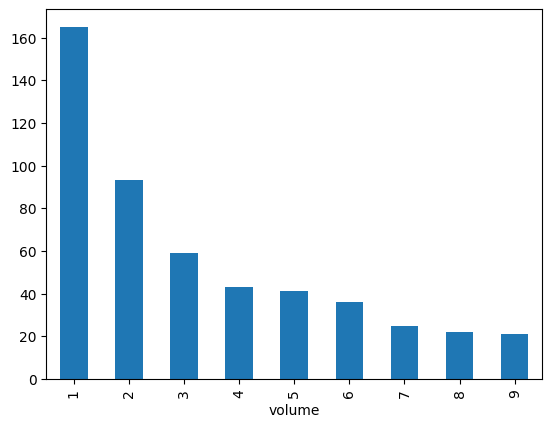

In [59]:
# ENTER YOUR CODE HERE.
df['volume'] = df['volume'].astype(str) # converting everything in the column "volume" to a string
first_digits = df.volume.str[0]  # extract first digit from each string in volume
first_digits.value_counts() # value_counts creates a series of every number in volume and counts the occurence

import matplotlib  
%matplotlib inline

df_first = first_digits.value_counts() # variable for holding counts of each variable to plot
df_first.sort_index(inplace=True) # sorts the index's of the first digits of volume 1-9, inplace modified current object and does not make copy
df_first.plot.bar() # .bar() is used to create bar graphs 

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

<Axes: xlabel='volume'>

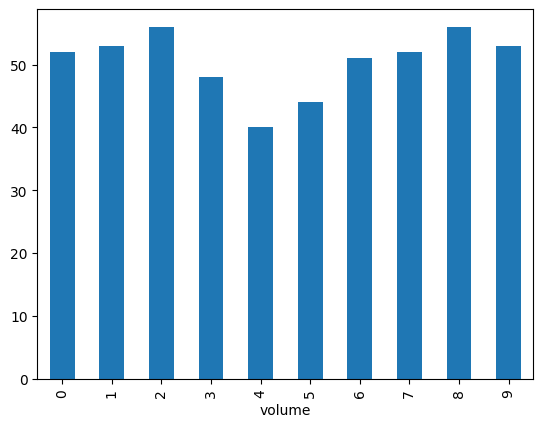

In [60]:
# ENTER YOUR CODE HERE.

last_digits = df.volume.str[-1] # extracting last digit from vol


df_last = last_digits.value_counts() # extracting the count of each digit, (series)
df_last.sort_index(inplace = True)
df_last.plot.bar()




**ENTER YOUR WRITTEN EXPLANATION HERE.**

According to my hypothesis, I expected about 5.5% of values of the last digit to be 1. It was approx 10%. My hypothesis was based on a false information as I though there would be floating point numbers. Had I known this, I probably would have guessed equal distribution of each digit having a an 11% chance. My hypothesis for the last digit being 9 was pretty much true based on equal distribution. I approximated 11% of the values and the actual answer was approx 10.1% 

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

Percentage of times '1' is the first digit: 33.86%


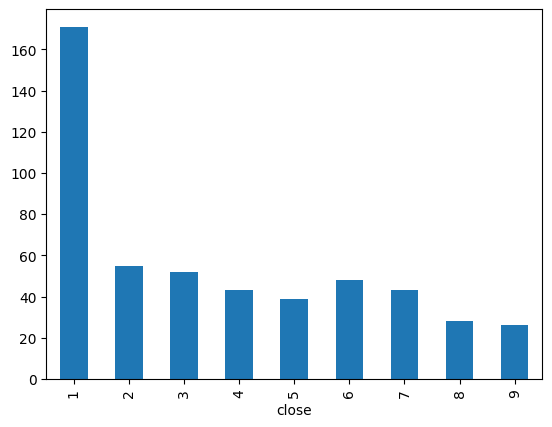

In [64]:
# ENTER YOUR CODE HERE.


df.close = df.close.apply(str) # change the close data frame to str instead of int
df.close = df.close.str.strip('$') # strip the '$' from column
cfirst_digits = df.close.str[0] # get the 1st digit of every string in close
cfirst_digits.value_counts() # get the count of each first digit


df_close = cfirst_digits.value_counts() # set the dataframe to the counts 
df_close.sort_index(inplace= True) # sort the counts
df_close.plot.bar() # plotting the counts of each first digit

percentage_1 = (df_close['1'] / df_close.sum()) * 100 

print(f"Percentage of times '1' is the first digit: {percentage_1:.2f}%")







**ENTER YOUR WRITTEN EXPLANATION HERE.**

I noticed the first digit being 1 is a lot more common. Using Pandas, I was able to figure out the percenatge of how many times 1 apears as the first digit.. It appears 33.86% of the time in the data. Shares that are greater than or equal to $100 seem to be common in the S&P 500 dataset, therefore this could be the reason why 1 appears the most frequently.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. This quarter, you don't need to demo Lab 1. The first lab to demo will be Lab 2.

2. Upload your .ipyn Notebook to Canvas and pdf to Gradescope.